In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import numpy as np
from numpy import array
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import networkx as nx

Exersice A

In [134]:
data1 = [['Clover', 'Holstein', 2, 20, 'lively', 'rock'], 
         ['Sunny', 'Ayrshire', 2, 10, 'kind', 'rock'],
         ['Rose', 'Holstein', 5, 15, 'calm', 'country'],
         ['Daisy', 'Ayrshire', 4, 25, 'calm', 'classical'],
         ['Strawberry', 'Finncattle', 7, 35, 'calm', 'classical'],
         ['Molly', 'Ayrshire', 8, 45, 'kind', 'country']]
data1 = pd.DataFrame(data1, columns = ['name', 'race', 'age', 'milk/d', 'character', 'music'])
data1 = data1.select_dtypes(['number'])
print(data1)

   age  milk/d
0    2      20
1    2      10
2    5      15
3    4      25
4    7      35
5    8      45


<AxesSubplot:>

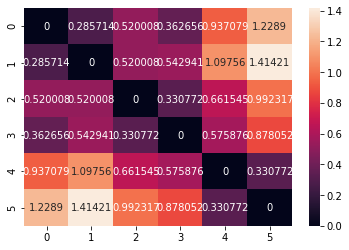

In [139]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data1)
data1 = scaler.transform(data1)
dist = metrics.pairwise.euclidean_distances(data1,data1)
sns.heatmap(dist, annot=True, fmt='g')

Exersice B

In [114]:
data2 = [['Clover', 'Holstein', 'lively', 'rock'], 
         ['Sunny', 'Ayrshire', 'kind', 'rock'],
         ['Rose', 'Holstein', 'calm', 'country'],
         ['Daisy', 'Ayrshire', 'calm', 'classical'],
         ['Strawberry', 'Finncattle', 'calm', 'classical'],
         ['Molly', 'Ayrshire', 'kind', 'country']]

p = {
    "Holstein": 1/3,
    "Ayrshire": 1/2,
    "Finncattle": 1/6,
    "lively": 1/6,
    "kind": 1/3,
    "calm": 1/2,
    "rock": 1/3,
    "country": 1/3,
    "classical": 1/3
}

pairs = []

def goodall(r):
    d = []
    for row in data2:
        sum = 0
        for i in range(1,4):
            if (r[i] == row[i]):
                sum += 1-pow(p[r[1]],2)
        print(r[0] + "-" + row[0] + ":  " + '{:.2f}'.format(float(sum/3)))
        d.append(float(sum/3))
    pairs.append(d)

for row in data2:
    goodall(row)
    
print(pairs)


Clover-Clover:  0.89
Clover-Sunny:  0.30
Clover-Rose:  0.30
Clover-Daisy:  0.00
Clover-Strawberry:  0.00
Clover-Molly:  0.00
Sunny-Clover:  0.25
Sunny-Sunny:  0.75
Sunny-Rose:  0.00
Sunny-Daisy:  0.25
Sunny-Strawberry:  0.00
Sunny-Molly:  0.50
Rose-Clover:  0.30
Rose-Sunny:  0.00
Rose-Rose:  0.89
Rose-Daisy:  0.30
Rose-Strawberry:  0.30
Rose-Molly:  0.30
Daisy-Clover:  0.00
Daisy-Sunny:  0.25
Daisy-Rose:  0.25
Daisy-Daisy:  0.75
Daisy-Strawberry:  0.50
Daisy-Molly:  0.25
Strawberry-Clover:  0.00
Strawberry-Sunny:  0.00
Strawberry-Rose:  0.32
Strawberry-Daisy:  0.65
Strawberry-Strawberry:  0.97
Strawberry-Molly:  0.00
Molly-Clover:  0.00
Molly-Sunny:  0.50
Molly-Rose:  0.25
Molly-Daisy:  0.25
Molly-Strawberry:  0.00
Molly-Molly:  0.75
[[0.8888888888888888, 0.2962962962962963, 0.2962962962962963, 0.0, 0.0, 0.0], [0.25, 0.75, 0.0, 0.25, 0.0, 0.5], [0.2962962962962963, 0.0, 0.8888888888888888, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963], [0.0, 0.25, 0.25, 0.75, 0.5, 0.25], 

In [115]:
data2 = pd.DataFrame(pairs, columns = ['Clover', 'Sunny', 'Rose', 'Daisy', 'Strawberry', 'Molly'])
print(data)

[['Clover', 'Holstein', 'lively', 'rock'], ['Sunny', 'Ayrshire', 'kind', 'rock'], ['Rose', 'Holstein', 'calm', 'country'], ['Daisy', 'Ayrshire', 'calm', 'classical'], ['Strawberry', 'Finncattle', 'calm', 'classical'], ['Molly', 'Ayrshire', 'kind', 'country']]


<AxesSubplot:>

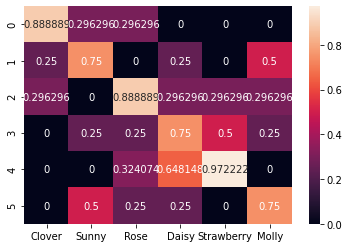

In [121]:
sns.heatmap(data2, annot=True, fmt='g')

Exersice C

<AxesSubplot:>

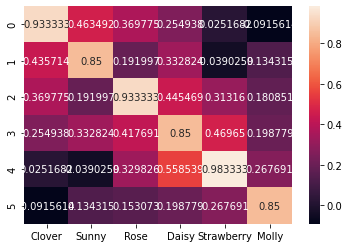

In [159]:
numsim = []
for i in dist:
    temp = []
    for j in i:
        temp.append(1 - j)
    numsim.append(temp)
numsim = np.array(numsim)
# sim(x, y) = λ · NumSim + (1−λ) · CatSim
sim2 = 0.4 * numsim + 0.6 * data2
sns.heatmap(sim2, annot=True, fmt='g')

Exersice D

<AxesSubplot:>

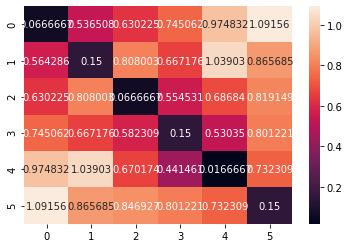

In [173]:
simToDist = []
tmp = np.array(sim2)
for i in tmp:
    temp = []
    for j in i:
        temp.append(1 - j)
    simToDist.append(temp)
simToDist = np.array(simToDist)
sns.heatmap(simToDist, annot=True, fmt='g')